In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
D=pd.read_csv(r"C:\Users\RAHUL PATIL\Downloads\archive (13)\spam_email_dataset.csv")
D

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,cassidytaylor@example.com,Current team yet like realize American.,martinezangela@example.net,perkinsmatthew@example.org,10-04-2023,07:18,1,7,114,83,0,3,2,0,5,0
5996,lisatate@example.com,Also start certainly range great try others.,mckenzieerika@example.net,jeremy75@example.org,07-05-2023,19:45,1,5,19,10,0,0,1,7,0,0
5997,cassandravazquez@example.org,Matter issue win agent likely.,dlewis@example.org,cervanteskimberly@example.org,08-04-2023,18:49,2,10,52,45,5,3,0,10,4,0
5998,amoore@example.com,Again member father.,eperry@example.org,dana02@example.org,19-01-2023,14:00,3,2,178,76,0,1,2,11,1,1


In [14]:
D.isna().sum()

Email                0
Subject              0
Sender               0
Recipient            0
Date                 0
Time                 0
Attachments          0
Link Count           0
Word Count           0
Uppercase Count      0
Exclamation Count    0
Question Count       0
Dollar Count         0
Punctuation Count    0
HTML Tags Count      0
Spam Indicator       0
dtype: int64

In [15]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Email              6000 non-null   object
 1   Subject            6000 non-null   object
 2   Sender             6000 non-null   object
 3   Recipient          6000 non-null   object
 4   Date               6000 non-null   object
 5   Time               6000 non-null   object
 6   Attachments        6000 non-null   int64 
 7   Link Count         6000 non-null   int64 
 8   Word Count         6000 non-null   int64 
 9   Uppercase Count    6000 non-null   int64 
 10  Exclamation Count  6000 non-null   int64 
 11  Question Count     6000 non-null   int64 
 12  Dollar Count       6000 non-null   int64 
 13  Punctuation Count  6000 non-null   int64 
 14  HTML Tags Count    6000 non-null   int64 
 15  Spam Indicator     6000 non-null   int64 
dtypes: int64(10), object(6)
memory usage: 750.

In [16]:
D.describe()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.497833,5.005500,153.269500,75.997667,2.481833,1.486000,0.989500,7.549667,2.528833,0.497000
std,1.125555,3.166092,83.135747,64.735568,1.717895,1.118785,0.812301,4.624619,1.703522,0.500033
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,83.000000,23.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,1.000000,5.000000,154.000000,59.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.000000
75%,3.000000,8.000000,223.000000,114.000000,4.000000,2.000000,2.000000,12.000000,4.000000,1.000000
max,3.000000,10.000000,300.000000,300.000000,5.000000,3.000000,2.000000,15.000000,5.000000,1.000000


In [19]:
D.columns

Index(['Email', 'Subject', 'Sender', 'Recipient', 'Date', 'Time',
       'Attachments', 'Link Count', 'Word Count', 'Uppercase Count',
       'Exclamation Count', 'Question Count', 'Dollar Count',
       'Punctuation Count', 'HTML Tags Count', 'Spam Indicator'],
      dtype='object')

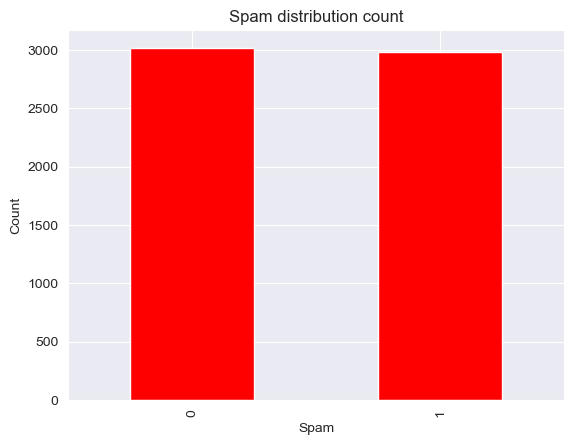

In [23]:
D['Spam Indicator'].value_counts().plot.bar(color = 'red')
plt.title('Spam distribution count')
plt.xlabel('Spam')
plt.ylabel('Count')
plt.show()

In [25]:
D['Spam Indicator'].value_counts().reset_index()

,Spam Indicator,count
0,0,3018
1,1,2982


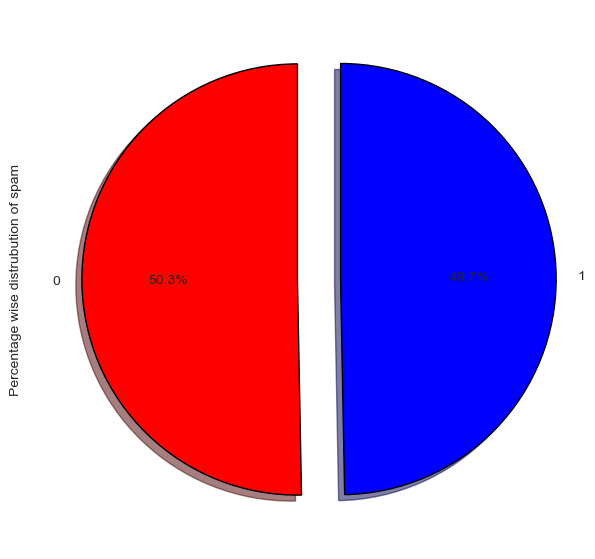

In [29]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'blue')

wp = {'linewidth':1, "edgecolor":'black'}

tags = D['Spam Indicator'].value_counts()/D.shape[0]

explode=(0,0.2)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of spam')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

In [30]:
D['Word Count'].value_counts().reset_index()

,Word Count,count
0,93,35
1,193,33
2,102,33
3,59,33
4,110,32
...,...,...
286,162,10
287,247,10
288,200,10
289,106,8


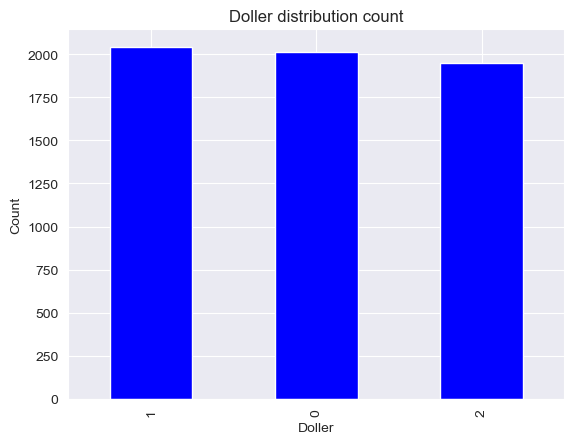

In [34]:
D['Dollar Count'].value_counts().plot.bar(color = 'blue')
plt.title('Doller distribution count')
plt.xlabel('Doller')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='Percentage wise distrubution of Doller Count'>

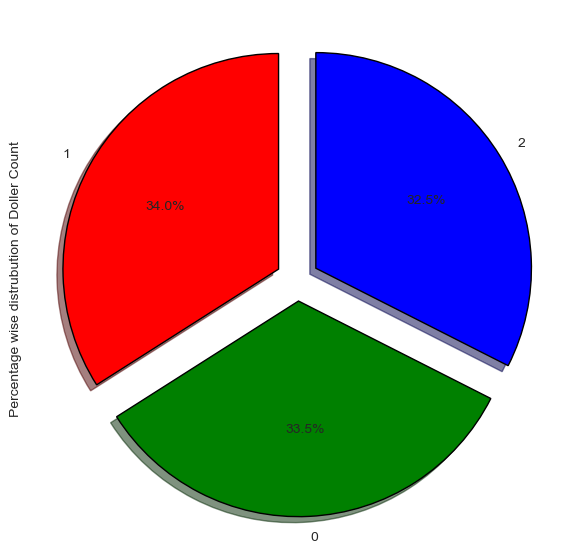

In [39]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green','blue')

wp = {'linewidth':1, "edgecolor":'black'}

tags = D['Dollar Count'].value_counts()/D.shape[0]

explode=(0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of Doller Count')

[Text(0.5, 1.0, 'Distribution of word count')]

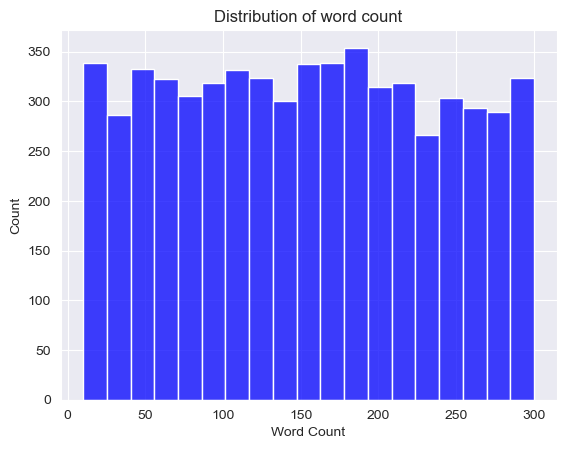

In [41]:
sns.histplot(D['Word Count'],color='blue').set(title='Distribution of word count')

[Text(0.5, 1.0, 'Distribution of Attachments and Spam indicator')]

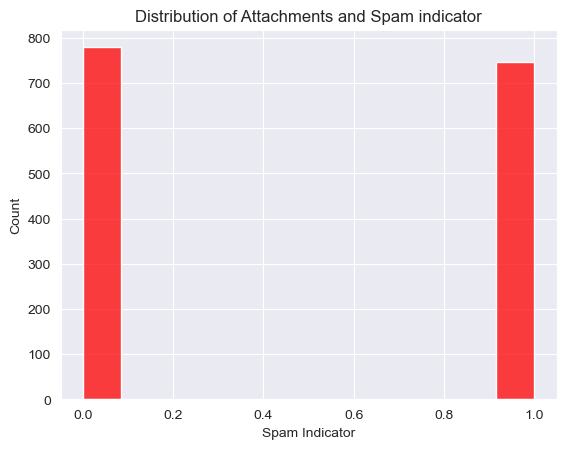

In [42]:
sns.histplot(D[D['Attachments']==0]['Spam Indicator'],color='red').set(title='Distribution of Attachments and Spam indicator')

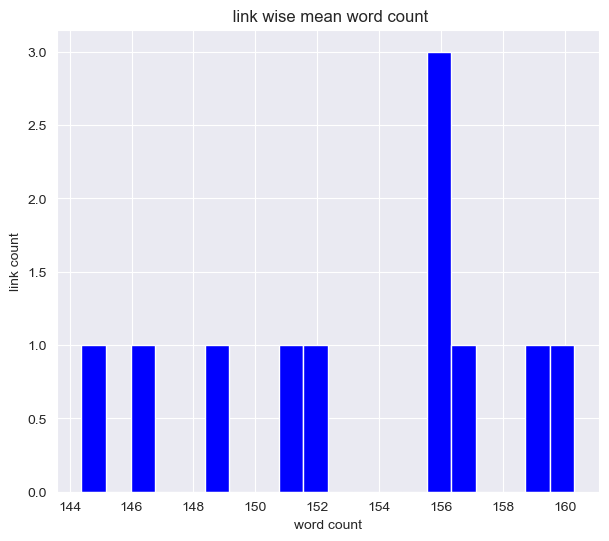

In [45]:
D.groupby('Link Count')['Word Count'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" link wise mean word count")
plt.xlabel('word count')
plt.ylabel('link count')
plt.show()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer#bag of word


In [48]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(D.Subject)

In [50]:
from wordcloud import WordCloud#TFIDF


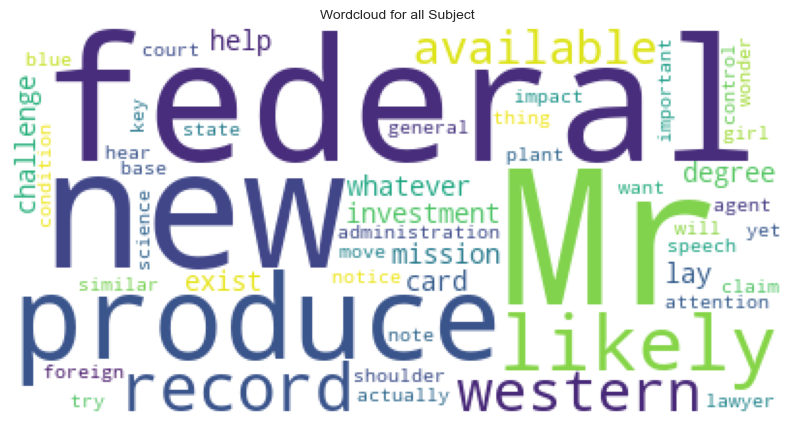

In [52]:
reviews = " ".join([sub for sub in D['Subject']])
                        
wc = WordCloud(background_color='white', max_words=50)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all Subject', fontsize=10)
plt.axis('off')
plt.show()

In [53]:
neg_sub = " ".join([sub for sub in D[D['Spam Indicator'] == 0]['Subject']])
neg_sub = neg_sub.lower().split()

pos_sub = " ".join([sub for sub in D[D['Spam Indicator'] == 1]['Subject']])
pos_sub = pos_sub.lower().split()

unique_negative = [x for x in neg_sub if x not in pos_sub]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_sub if x not in neg_sub]
unique_positive = " ".join(unique_positive)


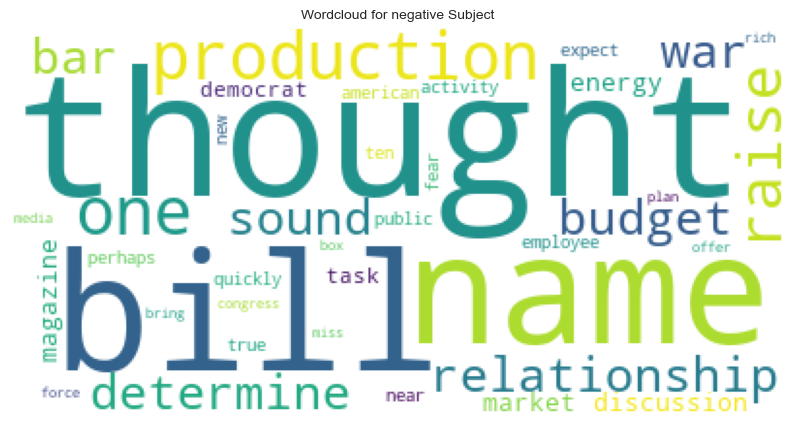

In [54]:
wc = WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative Subject', fontsize=10)
plt.axis('off')
plt.show()

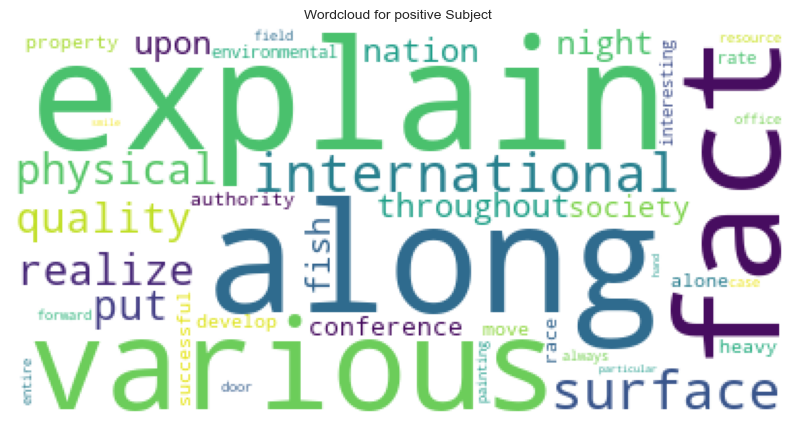

In [55]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive Subject', fontsize=10)
plt.axis('off')
plt.show()

In [60]:
from nltk.stem.porter import PorterStemmer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to C:\Users\RAHUL
[nltk_data]     PATIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, D.shape[0]):
  Sub = re.sub('[^a-zA-Z]', ' ', D.iloc[i]['Subject'])
  Sub = Sub.lower().split()
  Sub = [stemmer.stem(word) for word in Sub if not word in STOPWORDS]
  Sub = ' '.join(Sub)
  corpus.append(Sub)

In [62]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = D['Spam Indicator'].values

In [63]:
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

In [64]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (6000, 839)
y shape: (6000,)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (4200, 839)
y train: (4200,)
X test: (1800, 839)
y test: (1800,)


In [66]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 2
X test max value: 2


In [67]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [68]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [69]:
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()
L.fit(X_train_scl, y_train)

LogisticRegression()

In [70]:
print("Training Accuracy :", L.score(X_train_scl, y_train))
print("Testing Accuracy :", L.score(X_test_scl, y_test))

Training Accuracy : 0.6938095238095238
Testing Accuracy : 0.5166666666666667


In [71]:
from sklearn.neighbors import KNeighborsClassifier
K=KNeighborsClassifier()
K.fit(X_train_scl, y_train)

KNeighborsClassifier()

In [72]:
print("Training Accuracy :", K.score(X_train_scl, y_train))
print("Testing Accuracy :", K.score(X_test_scl, y_test))

Training Accuracy : 0.6761904761904762
Testing Accuracy : 0.5188888888888888


In [73]:
from sklearn.ensemble import RandomForestClassifier
R=RandomForestClassifier()
R.fit(X_train_scl, y_train)

RandomForestClassifier()

In [74]:
print("Training Accuracy :", R.score(X_train_scl, y_train))
print("Testing Accuracy :", R.score(X_test_scl, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.5122222222222222


In [82]:
from sklearn.ensemble import StackingClassifier


In [76]:
from sklearn.svm import SVC
S=SVC()
S.fit(X_train_scl, y_train)

SVC()

In [77]:
print("Training Accuracy :", S.score(X_train_scl, y_train))
print("Testing Accuracy :", S.score(X_test_scl, y_test))

Training Accuracy : 0.9338095238095238
Testing Accuracy : 0.505


In [85]:
from sklearn.naive_bayes import GaussianNB
G=GaussianNB()
G.fit(X_train_scl, y_train)

GaussianNB()

In [86]:
print("Training Accuracy :", G.score(X_train_scl, y_train))
print("Testing Accuracy :", G.score(X_test_scl, y_test))

Training Accuracy : 0.6811904761904762
Testing Accuracy : 0.51


In [87]:
from sklearn.naive_bayes import BernoulliNB
B=BernoulliNB()
B.fit(X_train_scl, y_train)

BernoulliNB()

In [88]:
print("Training Accuracy :", B.score(X_train_scl, y_train))
print("Testing Accuracy :", B.score(X_test_scl, y_test))

Training Accuracy : 0.6842857142857143
Testing Accuracy : 0.5116666666666667


In [89]:
from sklearn.naive_bayes import MultinomialNB
M=MultinomialNB()
M.fit(X_train_scl, y_train)

MultinomialNB()

In [90]:
print("Training Accuracy :", M.score(X_train_scl, y_train))
print("Testing Accuracy :", M.score(X_test_scl, y_test))

Training Accuracy : 0.6833333333333333
Testing Accuracy : 0.5105555555555555


In [91]:
from sklearn.naive_bayes import ComplementNB
C=ComplementNB()
C.fit(X_train_scl, y_train)

ComplementNB()

In [93]:
print("Training Accuracy :", C.score(X_train_scl, y_train))
print("Testing Accuracy :", C.score(X_test_scl, y_test))

Training Accuracy : 0.6838095238095238
Testing Accuracy : 0.51


In [94]:
from xgboost import XGBClassifier
x=XGBClassifier()
x.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [95]:
print("Training Accuracy :", x.score(X_train_scl, y_train))
print("Testing Accuracy :", x.score(X_test_scl, y_test))

Training Accuracy : 0.6821428571428572
Testing Accuracy : 0.515


In [103]:
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('svc', SVC(kernel='linear', probability=True)),
    ('knn',KNeighborsClassifier()),
    ('NB',GaussianNB()),
    ('ber',BernoulliNB()),
    ('mul',MultinomialNB()),
    ('com',ComplementNB()),
    ('xg',XGBClassifier())
    
]


In [104]:
final_estimator = LogisticRegression()


In [105]:
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)


In [106]:
stacking_clf

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('svc', SVC(kernel='linear', probability=True)),
                               ('knn', KNeighborsClassifier()),
                               ('NB', GaussianNB()), ('ber', BernoulliNB()),
                               ('mul', MultinomialNB()),
                               ('com', ComplementNB()),
                               ('xg',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_by...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [111]:
stacking_clf.fit(X_train_scl,y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('svc', SVC(kernel='linear', probability=True)),
                               ('knn', KNeighborsClassifier()),
                               ('NB', GaussianNB()), ('ber', BernoulliNB()),
                               ('mul', MultinomialNB()),
                               ('com', ComplementNB()),
                               ('xg',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_by...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [112]:
print("Training Accuracy :", stacking_clf.score(X_train_scl, y_train))
print("Testing Accuracy :", stacking_clf.score(X_test_scl, y_test))

Training Accuracy : 0.6183333333333333
Testing Accuracy : 0.5105555555555555


In [115]:
y_preds = R.predict(X_test_scl)

In [116]:
cm = confusion_matrix(y_test, y_preds)

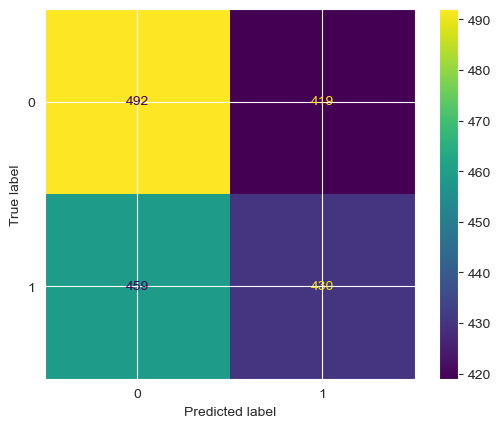

In [118]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=R.classes_)
cm_display.plot()
plt.show()

In [120]:
import tensorflow as tf
from tensorflow import keras

In [125]:
model=keras.Sequential([
    keras.layers.Dense(150,input_shape=(839,),activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(110,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
             metrics=['accuracy'])

In [128]:
model.fit(X_train_scl,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9950 - loss: 0.0102 - val_accuracy: 0.9929 - val_loss: 0.0266
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9987 - loss: 0.0047 - val_accuracy: 0.9881 - val_loss: 0.0471
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9995 - loss: 0.0041 - val_accuracy: 0.9857 - val_loss: 0.0414
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9881 - val_loss: 0.0270
Epoch 5/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9999 - loss: 9.3030e-04 - val_accuracy: 0.9857 - val_loss: 0.0388
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9991 - loss: 0.0024 - val_accuracy: 0.9857 - val_loss: 0.0340
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9972 - loss: 0.0092 - val_accuracy: 0.9857 - val_loss: 0.0342
Epoch 8/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 3.4495e-04 - val_accu